In [1]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests, zipfile, io    # in order to open a zip file

In [2]:
# get the wanted zipfile from the url link by using class 'get'
r = requests.get('https://data.moi.gov.tw/MoiOD/System/DownloadFile.aspx?DATA=1D9373AC-9A39-43A0-9001-611B681AAB49')

# use the class 'ZipFile' to read the file
zf = zipfile.ZipFile(io.BytesIO(r.content))

# extract all members from the archive
zf.extractall()

In [3]:
zf.infolist()    # see all the files in it

[<ZipInfo filename='ªU»┼─╡╣ε╛≈├÷▓{ª│Ñ┐ªí¡√├Bí╨ª~╕ΩºO.xlsx' compress_type=deflate external_attr=0x20 file_size=19428 compress_size=16857>,
 <ZipInfo filename='file.csv' compress_type=deflate external_attr=0x20 file_size=123 compress_size=84>,
 <ZipInfo filename='manifest.csv' compress_type=deflate external_attr=0x20 file_size=59 compress_size=46>,
 <ZipInfo filename='schema-file.csv' external_attr=0x20 file_size=49>]

### 讀入並整理「各級警察機關現有正式員額－年資別」資料表

In [4]:
df_Cops = pd.read_excel(zf.open('ªU»┼─╡╣ε╛≈├÷▓{ª│Ñ┐ªí¡√├Bí╨ª~╕ΩºO.xlsx'))

In [5]:
df_Cops.head()

,單位：人,各級警察機關現有正式員額－年資別,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,表格數：1,Unnamed: 8,Unnamed: 9,...,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,總計(人),NaN,NaN,NaN,NaN,NaN,NaN,NaN,警察官,...,NaN,NaN,雇用,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上,總計,...,25~29年,30年以上,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上
3,94年,67921,2807,3173,17935,23267,11465,6498,2776,63493,...,252,135,441,0,4,79,173,89,63,33
4,95年,68749,4732,1934,16054,23145,12860,6955,3069,64302,...,320,132,380,0,1,50,156,86,55,32


In [6]:
df_Cops.drop(df_Cops.index[0:2], inplace = True)

In [7]:
df_Cops = df_Cops.reset_index(drop = True)

In [8]:
df_Cops.head()

,單位：人,各級警察機關現有正式員額－年資別,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,表格數：1,Unnamed: 8,Unnamed: 9,...,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88
0,,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上,總計,...,25~29年,30年以上,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上
1,94年,67921,2807,3173,17935,23267,11465,6498,2776,63493,...,252,135,441,0,4,79,173,89,63,33
2,95年,68749,4732,1934,16054,23145,12860,6955,3069,64302,...,320,132,380,0,1,50,156,86,55,32
3,96年,67758,6571,1114,12771,24247,12751,6959,3345,63666,...,263,138,332,0,1,37,148,82,40,24
4,97年,69638,9282,1305,9746,18285,19278,8145,3597,65533,...,282,131,255,0,2,15,122,52,42,22


In [9]:
col_Names = df_Cops.loc[0]

In [10]:
df_Cops.columns = col_Names

In [11]:
df_Cops.head()

,,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上,總計,...,25~29年,30年以上,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上
0,,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上,總計,...,25~29年,30年以上,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上
1,94年,67921,2807,3173,17935,23267,11465,6498,2776,63493,...,252,135,441,0,4,79,173,89,63,33
2,95年,68749,4732,1934,16054,23145,12860,6955,3069,64302,...,320,132,380,0,1,50,156,86,55,32
3,96年,67758,6571,1114,12771,24247,12751,6959,3345,63666,...,263,138,332,0,1,37,148,82,40,24
4,97年,69638,9282,1305,9746,18285,19278,8145,3597,65533,...,282,131,255,0,2,15,122,52,42,22


In [12]:
df_Cops.drop(index = 0, inplace = True)

In [13]:
df_Cops.head()

,,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上,總計,...,25~29年,30年以上,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上
1,94年,67921,2807,3173,17935,23267,11465,6498,2776,63493,...,252,135,441,0,4,79,173,89,63,33
2,95年,68749,4732,1934,16054,23145,12860,6955,3069,64302,...,320,132,380,0,1,50,156,86,55,32
3,96年,67758,6571,1114,12771,24247,12751,6959,3345,63666,...,263,138,332,0,1,37,148,82,40,24
4,97年,69638,9282,1305,9746,18285,19278,8145,3597,65533,...,282,131,255,0,2,15,122,52,42,22
5,98年,69133,9299,1618,1813,16771,21620,10991,7021,65030,...,282,260,285,0,0,1,65,118,55,46


In [14]:
df_Cops.columns[0]

'\xa0\xa0\u3000\u3000\u3000\u3000'

In [15]:
df_Cops.rename(columns = {'\xa0\xa0\u3000\u3000\u3000\u3000':'年度'}, inplace = True)

In [16]:
df_Cops.dropna(axis = 0, inplace = True)

In [17]:
df_Cops.head()

,年度,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上,總計,...,25~29年,30年以上,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上
1,94年,67921,2807,3173,17935,23267,11465,6498,2776,63493,...,252,135,441,0,4,79,173,89,63,33
2,95年,68749,4732,1934,16054,23145,12860,6955,3069,64302,...,320,132,380,0,1,50,156,86,55,32
3,96年,67758,6571,1114,12771,24247,12751,6959,3345,63666,...,263,138,332,0,1,37,148,82,40,24
4,97年,69638,9282,1305,9746,18285,19278,8145,3597,65533,...,282,131,255,0,2,15,122,52,42,22
5,98年,69133,9299,1618,1813,16771,21620,10991,7021,65030,...,282,260,285,0,0,1,65,118,55,46


In [18]:
df_Cops = df_Cops.iloc[:, :9]    # 只留下警員總數以及各年齡層的分配

In [19]:
df_Cops.head()

,年度,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上
1,94年,67921,2807,3173,17935,23267,11465,6498,2776
2,95年,68749,4732,1934,16054,23145,12860,6955,3069
3,96年,67758,6571,1114,12771,24247,12751,6959,3345
4,97年,69638,9282,1305,9746,18285,19278,8145,3597
5,98年,69133,9299,1618,1813,16771,21620,10991,7021


### 讀入並整理「刑事案件發生數、破獲數及嫌疑犯人數」資料表

In [20]:
df_Crimes = pd.read_excel('https://www.npa.gov.tw/NPAGip/wSite/public/Attachment/f1532578397525.xls',
                          skiprows = 6, sheet_name = None)

In [21]:
xls_Crimes = pd.ExcelFile('https://www.npa.gov.tw/NPAGip/wSite/public/Attachment/f1532578397525.xls')

In [22]:
xls_Crimes.sheet_names[:3]

['表4', '表4(續1)', '表4(續2)']

In [23]:
df_Crimes_95 = df_Crimes.get('表4')
df_Crimes_105 = df_Crimes.get('表4(續1)')
df_Crimes_106 = df_Crimes.get('表4(續2)')

In [24]:
df_Crimes_95.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,╰——v———╯,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,民國 86年\n1997,╭\n｜\n﹤\n｜\n╰,發生數,Cases Known to the Police,426425,319902,967,59151,35824,223960,1203,13546,7908,NaN,7908.0,NaN,3217,897,2199
1,NaN,NaN,破獲數,Cases Cleared,242392,148074,546,17585,19502,110441,1201,13546,5630,NaN,5630.0,NaN,1509,891,1680
2,NaN,NaN,嫌疑犯,Offenders,172540,34162,547,17307,2434,13874,1584,35519,7512,NaN,7512.0,NaN,1242,1196,2143
3,民國 87年\n1998,╭\n｜\n﹤\n｜\n╰,發生數,Cases Known to the Police,434513,334495,685,55445,46694,231671,1090,8940,8145,NaN,8145.0,NaN,4294,1358,2115
4,NaN,NaN,破獲數,Cases Cleared,251638,164354,423,16868,26784,120279,1090,8940,6080,NaN,6080.0,NaN,1707,1353,1657


In [25]:
df_Crimes_105.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,民國 96年\n2007,╭\n｜\n﹤\n｜\n╰,發生數,Cases Known to the Police,491815,241091,321,118393,31966,90411,1003,5512,12155,45,12110,40556,40348,208,3228,3854
1,NaN,NaN,破獲數,Cases Cleared,367001,150108,230,49431,22326,78121,1003,5512,9649,45,9604,34435,34292,143,3194,2834
2,NaN,NaN,嫌疑犯,Offenders,265860,42053,402,33763,2258,5630,967,11956,13236,75,13161,25218,25026,192,2601,3883
3,民國 97年\n2008,╭\n｜\n﹤\n｜\n╰,發生數,Cases Known to the Police,453439,209351,295,101335,28508,79213,1299,5490,11254,31,11223,41219,40963,256,3466,3799
4,NaN,NaN,破獲數,Cases Cleared,350497,133823,225,45531,19723,68344,1299,5490,9335,30,9305,35098,34881,217,3445,3044


In [26]:
df_Crimes_106.head()

,民國106年 2017,Unnamed: 1,╭ ｜ ﹤ ｜ ╰,發生數,Cases Known to the Police,293453,52025,32,36825,3086,...,246,6447,11709,33,11676,23623,22689,934,857,7391
0,NaN,NaN,NaN,破獲數,Cases Cleared,277506,46022,31,31588,2729,...,246,6447,11152,33,11119,21667,20833,834,844,6904
1,NaN,NaN,NaN,嫌疑犯,Offenders,287294,32204,41,27929,1297,...,261,11038,15505,63,15442,25104,24330,774,1230,8535
2,1月 Jan.,NaN,╭\n｜\n﹤\n｜\n╰,發生數,Cases Known to the Police,24728,3959,3,2767,230,...,19,2480,901,2,899,1720,1632,88,88,570
3,NaN,NaN,NaN,破獲數,Cases Cleared,23085,3427,1,2308,227,...,19,2480,842,2,840,1426,1342,84,86,544
4,NaN,NaN,NaN,嫌疑犯,Offenders,23737,2296,1,1987,123,...,17,3562,1055,6,1049,1532,1483,49,103,579


In [27]:
df_Crimes_95 = df_Crimes_95.iloc[:,:5]
df_Crimes_105 = df_Crimes_105.iloc[:,:5]

In [28]:
df_Crimes_95.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,民國 86年\n1997,╭\n｜\n﹤\n｜\n╰,發生數,Cases Known to the Police,426425
1,NaN,NaN,破獲數,Cases Cleared,242392
2,NaN,NaN,嫌疑犯,Offenders,172540
3,民國 87年\n1998,╭\n｜\n﹤\n｜\n╰,發生數,Cases Known to the Police,434513
4,NaN,NaN,破獲數,Cases Cleared,251638


In [29]:
df_Crimes_95.drop(columns = {'Unnamed: 1', 'Unnamed: 3'},
                  axis = 1, inplace = True)

In [30]:
df_Crimes_95.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 4
0,民國 86年\n1997,發生數,426425
1,NaN,破獲數,242392
2,NaN,嫌疑犯,172540
3,民國 87年\n1998,發生數,434513
4,NaN,破獲數,251638


In [31]:
df_Crimes_105.drop(columns = {'Unnamed: 1', 'Unnamed: 3'},
                   axis = 1, inplace = True)

In [32]:
df_Crimes_105.head()

,Unnamed: 0,Unnamed: 2,Unnamed: 4
0,民國 96年\n2007,發生數,491815
1,NaN,破獲數,367001
2,NaN,嫌疑犯,265860
3,民國 97年\n2008,發生數,453439
4,NaN,破獲數,350497


In [33]:
df_Crimes_106 = df_Crimes_106.iloc[:2,:6]

In [34]:
df_Crimes_106.head()

,民國106年 2017,Unnamed: 1,╭ ｜ ﹤ ｜ ╰,發生數,Cases Known to the Police,293453
0,NaN,NaN,NaN,破獲數,Cases Cleared,277506
1,NaN,NaN,NaN,嫌疑犯,Offenders,287294


In [35]:
df_Crimes_106.columns

Index([             '民國106年\n2017',                'Unnamed: 1',
                   '╭\n｜\n﹤\n｜\n╰',                       '發生數',
       'Cases Known to the Police',                      293453],
      dtype='object')

In [36]:
df_Crimes_106.drop(columns = {'Unnamed: 1', '╭\n｜\n﹤\n｜\n╰', 'Cases Known to the Police'},
                   axis = 1, inplace = True)

In [37]:
df_Crimes_106.head()

,民國106年 2017,發生數,293453
0,NaN,破獲數,277506
1,NaN,嫌疑犯,287294


In [38]:
row_1 = pd.DataFrame(df_Crimes_106.columns)

In [39]:
row_1.head()

,0
0,民國106年\n2017
1,發生數
2,293453


In [40]:
row_1 = row_1.T

In [41]:
row_1.columns = ['年度', '類別', '數據']

In [42]:
row_1.head()

,年度,類別,數據
0,民國106年\n2017,發生數,293453


In [43]:
df_Crimes_106.columns = ['年度', '類別', '數據']

In [44]:
df_Crimes_106.head()

,年度,類別,數據
0,NaN,破獲數,277506
1,NaN,嫌疑犯,287294


In [45]:
df_Crimes_106 = pd.concat([row_1, df_Crimes_106], axis = 0).reset_index(drop = True)

In [46]:
df_Crimes_106.head()

,年度,類別,數據
0,民國106年\n2017,發生數,293453
1,NaN,破獲數,277506
2,NaN,嫌疑犯,287294


In [47]:
df_Crimes_95.columns = ['年度', '類別', '數據']

In [48]:
df_Crimes_105.columns = ['年度', '類別', '數據']

In [49]:
df_Crimes_95.loc[df_Crimes_95['年度'] == '民國 94年\n2005']

,年度,類別,數據
24,民國 94年\n2005,發生數,555109


In [50]:
df_Crimes_95 = df_Crimes_95.iloc[24:,:]    # 配合警員資料從民國 94年開始統計

In [51]:
df_Crimes_95

,年度,類別,數據
24,民國 94年\n2005,發生數,555109
25,NaN,破獲數,346677
26,NaN,嫌疑犯,207425
27,民國 95年\n2006,發生數,512788
28,NaN,破獲數,342329
29,NaN,嫌疑犯,229193


In [52]:
df_Crimes_105.head()

,年度,類別,數據
0,民國 96年\n2007,發生數,491815
1,NaN,破獲數,367001
2,NaN,嫌疑犯,265860
3,民國 97年\n2008,發生數,453439
4,NaN,破獲數,350497


In [53]:
df_Crimes = pd.concat([df_Crimes_95, df_Crimes_105, df_Crimes_106], axis = 0).reset_index(drop = True)

In [54]:
df_Crimes.head()

,年度,類別,數據
0,民國 94年\n2005,發生數,555109
1,NaN,破獲數,346677
2,NaN,嫌疑犯,207425
3,民國 95年\n2006,發生數,512788
4,NaN,破獲數,342329


In [55]:
df_CrimesCases = df_Crimes[df_Crimes['類別'] == '發生數'].reset_index(drop = True)

In [56]:
df_CrimesCases

,年度,類別,數據
0,民國 94年\n2005,發生數,555109
1,民國 95年\n2006,發生數,512788
2,民國 96年\n2007,發生數,491815
3,民國 97年\n2008,發生數,453439
4,民國 98年\n2009,發生數,386075
5,民國 99年\n2010,發生數,371934
6,民國100年\n2011,發生數,347674
7,民國101年\n2012,發生數,317356
8,民國102年\n2013,發生數,298967
9,民國103年\n2014,發生數,306300


In [57]:
for row in range(13):
    df_CrimesCases['年度'][row] = str(94 + row) + '年'

In [58]:
df_CrimesCases.head()

,年度,類別,數據
0,94年,發生數,555109
1,95年,發生數,512788
2,96年,發生數,491815
3,97年,發生數,453439
4,98年,發生數,386075


In [59]:
df_CrimesClosed = df_Crimes[df_Crimes['類別'] == '破獲數'].reset_index(drop = True)

In [60]:
df_CrimesClosed.head()

,年度,類別,數據
0,NaN,破獲數,346677
1,NaN,破獲數,342329
2,NaN,破獲數,367001
3,NaN,破獲數,350497
4,NaN,破獲數,311648


In [61]:
for row in range(13):
    df_CrimesClosed['年度'][row] = str(94 + row) + '年'

In [62]:
df_CrimesClosed.head()

,年度,類別,數據
0,94年,破獲數,346677
1,95年,破獲數,342329
2,96年,破獲數,367001
3,97年,破獲數,350497
4,98年,破獲數,311648


### 統一以年度作為資料 index

In [63]:
df_CrimesCases.index = df_CrimesCases['年度']
df_CrimesClosed.index = df_CrimesClosed['年度']
df_Cops.index = df_CrimesCases['年度']

In [64]:
df_CrimesCases.drop(columns = '年度', inplace = True)
df_CrimesClosed.drop(columns = '年度', inplace = True)

In [65]:
df_CrimesCases.head()

,類別,數據
年度,,
94年,發生數,555109
95年,發生數,512788
96年,發生數,491815
97年,發生數,453439
98年,發生數,386075


In [66]:
df_CrimesClosed.head()

,類別,數據
年度,,
94年,破獲數,346677
95年,破獲數,342329
96年,破獲數,367001
97年,破獲數,350497
98年,破獲數,311648


In [67]:
df_CrimesClosedRate = pd.concat([df_CrimesCases, df_CrimesClosed], axis = 1)

In [68]:
df_CrimesClosedRate.head()

,類別,數據,類別,數據
年度,,,,
94年,發生數,555109,破獲數,346677
95年,發生數,512788,破獲數,342329
96年,發生數,491815,破獲數,367001
97年,發生數,453439,破獲數,350497
98年,發生數,386075,破獲數,311648


In [69]:
df_CrimesClosedRate.drop(columns = '類別', inplace = True)

In [70]:
df_CrimesClosedRate.columns = ['發生數', '破獲數']

In [71]:
df_CrimesClosedRate.head()

,發生數,破獲數
年度,,
94年,555109,346677
95年,512788,342329
96年,491815,367001
97年,453439,350497
98年,386075,311648


In [72]:
df_CrimesClosedRate = df_CrimesClosedRate.assign(破案率 = df_CrimesClosedRate['破獲數'] / df_CrimesClosedRate['發生數'])

In [73]:
df_CrimesClosedRate

,發生數,破獲數,破案率
年度,,,
94年,555109,346677,0.624521
95年,512788,342329,0.667584
96年,491815,367001,0.746218
97年,453439,350497,0.772975
98年,386075,311648,0.807221
99年,371934,296500,0.797184
100年,347674,276371,0.794914
101年,317356,266512,0.839789
102年,298967,258802,0.865654


In [74]:
df_Cops.head()

,年度,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上
年度,,,,,,,,,
94年,94年,67921,2807,3173,17935,23267,11465,6498,2776
95年,95年,68749,4732,1934,16054,23145,12860,6955,3069
96年,96年,67758,6571,1114,12771,24247,12751,6959,3345
97年,97年,69638,9282,1305,9746,18285,19278,8145,3597
98年,98年,69133,9299,1618,1813,16771,21620,10991,7021


In [75]:
df_Cops.drop(df_Cops.columns[0], axis = 1, inplace = True)

In [76]:
df_Cops

,總計,5年以下,6~9年,10~14年,15~19年,20~24年,25~29年,30年以上
年度,,,,,,,,
94年,67921,2807,3173,17935,23267,11465,6498,2776
95年,68749,4732,1934,16054,23145,12860,6955,3069
96年,67758,6571,1114,12771,24247,12751,6959,3345
97年,69638,9282,1305,9746,18285,19278,8145,3597
98年,69133,9299,1618,1813,16771,21620,10991,7021
99年,70126,11926,1817,1990,15204,21903,10883,6403
100年,68622,10662,3743,1377,12587,22663,11256,6334
101年,67899,7573,8069,1622,5439,16332,20702,8162
102年,67109,9462,7952,1611,5423,16159,19812,6690


### 以「警員總數」對「破案率」做迴歸預測

In [77]:
from sklearn.linear_model import LinearRegression 

In [78]:
regr = LinearRegression()

In [79]:
x_train = np.array(df_Cops['總計'])
y_train = np.array(df_CrimesClosedRate['破案率'])

In [80]:
x_train = x_train.reshape(len(x_train), 1)
y_train = y_train.reshape(len(y_train), 1)

In [81]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### 以歷年最少警員人數為下限，最多警員人數為上限，產生 500 筆人數資料

In [82]:
min_Cops = df_Cops['總計'].min()
max_Cops = df_Cops['總計'].max()

In [83]:
x_test = np.linspace(min_Cops, max_Cops, 500)

In [84]:
x_test = x_test.reshape(500, 1)

In [85]:
Y_pred = regr.predict(x_test)

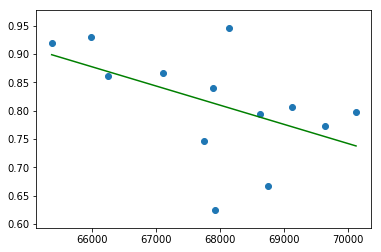

In [86]:
plt.scatter(x_train, y_train) 
plt.plot(x_test, Y_pred, 'g')

### 結論：「警員人數」與「破案率」呈「負相關」，但不能證明警員人數愈多，破案率愈低。
#### 也許警員人數愈多，整體辦案的效率愈低，破案率愈低。
#### 但我認為更有可能是還需要更多因子加入分析，例如時間就是很明顯與破案率正相關的因子，
#### 其他如監視器數量、死刑執行率、警員平均薪資等等，才能進一步接近因果關係的推導。

### 同場加映：以「5年以下警員總數」對「破案率」做迴歸預測

In [87]:
x_train = np.array(df_Cops['5年以下'])
y_train = np.array(df_CrimesClosedRate['破案率'])

In [88]:
x_train = x_train.reshape(len(x_train), 1)
y_train = y_train.reshape(len(y_train), 1)

In [89]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [90]:
min_Cops = df_Cops['5年以下'].min()
max_Cops = df_Cops['5年以下'].max()

In [91]:
x_test = np.linspace(min_Cops, max_Cops, 500)

In [92]:
x_test = x_test.reshape(500, 1)

In [93]:
Y_pred = regr.predict(x_test)

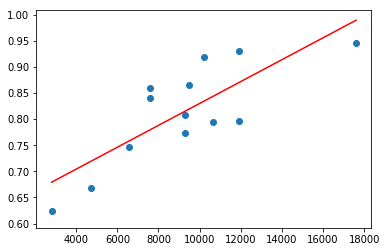

In [94]:
plt.scatter(x_train, y_train) 
plt.plot(x_test, Y_pred, 'r')

### 結論：「5年以下警員人數」與「破案率」呈「正相關」！
#### 可能菜逼八辦案比較勤勞、比較善用科技、體力比較好等等，讓破案率明顯與年輕員警數呈正相關。
#### 但一樣，只能說「可能」，要證明因果關係還早得很很呢！